# Part II - Defaulted Loans Exploration
## by Grazyna Ostrowska

## Investigation Overview


> I analysed which features should be investigated when loan default is considered.


## Dataset Overview and Executive Summary

> The analysed dataset consist of 113,937 Prosper loan records, encompassing loan status and various attributes such as borrower rate (or interest rate), employment status, recommendation count, borrower income, and more.

> Term, Loan Status, Borrower Rate, Listing Category, Employment Status Duration, Employment Status, Current Credit Lines, Debt To Income Ratio, Stated Monthly Income, Loan Original Amount, Investment From Friends Amount and Investors features were taken into account during Loan Default anaysis.

> Loans Status values were transformed into Defaulted and NonDefaulted values. The dataset is imbalanced Only 4.4% of loans were defaulted loans.

> Most popular listing category for non defaulted loans is debt consolidation. For defaulted loans 'not available' category occurs most often. Among defaulted loans debt consolidation is the second most numerous category.

> People that were employed or worked full-time most often borrowed loans that did not default. Most common emplyment statuses among defaulted loans were 'full-time' and 'not available'.

> Usually people take out 36-month loans.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## Defaulted and Non Defaulted Loans percent

> To analyse defaulted loans I transformed Loan Status. Oryginally Loan Status consisted of 7 statuses. All values despite 'Default' were transformed into 'NonDefault'. The dataset is imbalanced Only 4.4% of loans are defaulted loans.

In [4]:
# change values in LoanStatus into default, nondefault
df['LoanStatus'] = df['LoanStatus'].where(~df['LoanStatus'].isin(['Defaulted']),'Defaulted')
df['LoanStatus'] = df['LoanStatus'].where(df['LoanStatus'].isin(['Defaulted']),'NonDefaulted')

In [5]:
# plot count plot

def get_countplot(dataframe, column, title):
    
    """display count plot for a column
    column - input variable, column name to plot
    dataframe - data frame to use
    title - graph title
    """
    ax= sns.countplot(dataframe, x=column, order = dataframe[column].value_counts().index, stat="percent")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
        
    plt.title(title)
    plt.xticks();

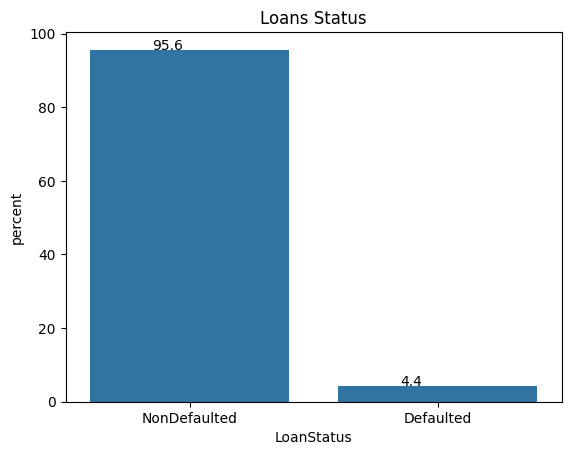

In [6]:
get_countplot(df, "LoanStatus", 'Loans Status')

## Loan Status by Listing Category

> Most popular listing category for non defaulted loans is debt consolidation. For defaulted loans 'not available' category occurs most often. Borrowers who are more likely to default may withhold or fail to provide certain information. 'Not available”  may become a kind of red flag—a proxy for risk.
Among defaulted loans debt consolidation is the second most numerous category. 

In [7]:
category = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 
          'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 
          'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
df['ListingCategory'] = df['ListingCategory (numeric)'].apply(lambda i : category[i])

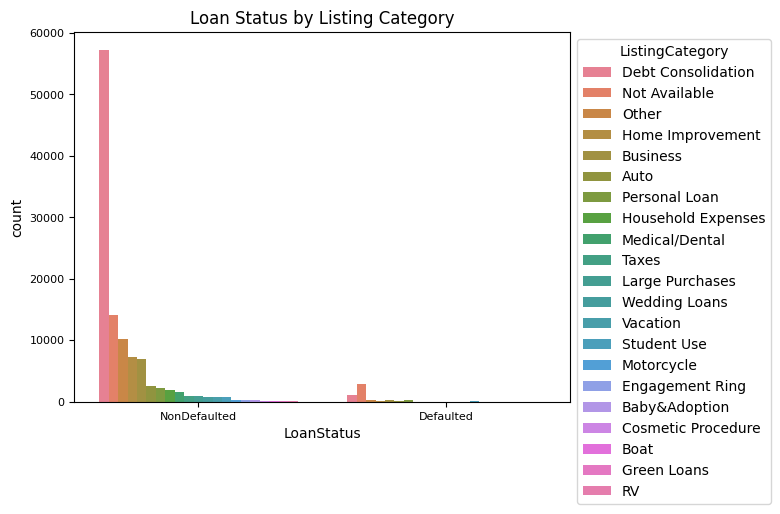

In [8]:
ax = sns.countplot(data = df, x = 'LoanStatus', hue = 'ListingCategory', hue_order = df['ListingCategory'].value_counts().index)
ax.yaxis.set_tick_params(labelsize=8)
ax.xaxis.set_tick_params(labelsize=8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Loan Status by Listing Category')
plt.show();

## Loan Status by Employment Status

> People that were employed or worked full-time most often borrowed loans that did not default. Most common emplyment statuses among defaulted loans were 'full-time' and 'not available'. Simllary to Listing Category, borrowers who are more likely to default may withhold or fail to provide certain information. 'Not available” may become a kind of red flag—a proxy for risk.

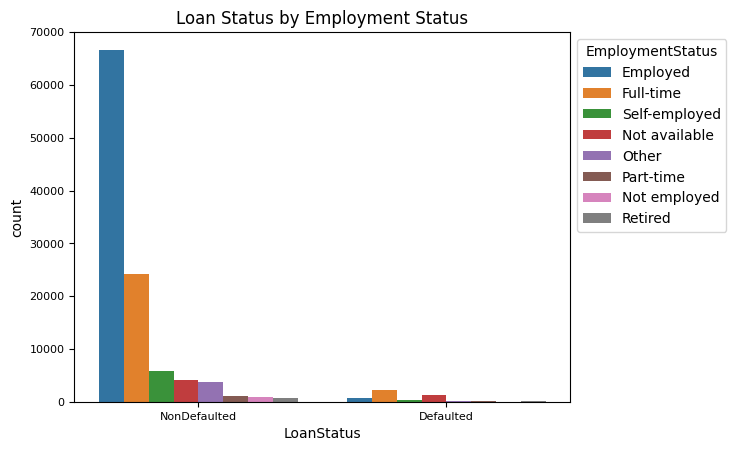

In [9]:
ax = sns.countplot(data = df, x = 'LoanStatus', hue = 'EmploymentStatus', hue_order=df['EmploymentStatus'].value_counts().index)
ax.yaxis.set_tick_params(labelsize=8)
ax.xaxis.set_tick_params(labelsize=8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Loan Status by Employment Status')
plt.show();

## Loan Status by Term

> Usually people take out 36-month loans. Compared to shorter terms (like 12 months), a 36-month loan has lower monthly payments. While a longer loan (like 60 months) would drop payments even more, it would rack up more interest over time. There are no defaulted loans among 12-month loans. Possibly, short-term loans are often given to low-risk borrowers and 12-month loans are usually for smaller sums.

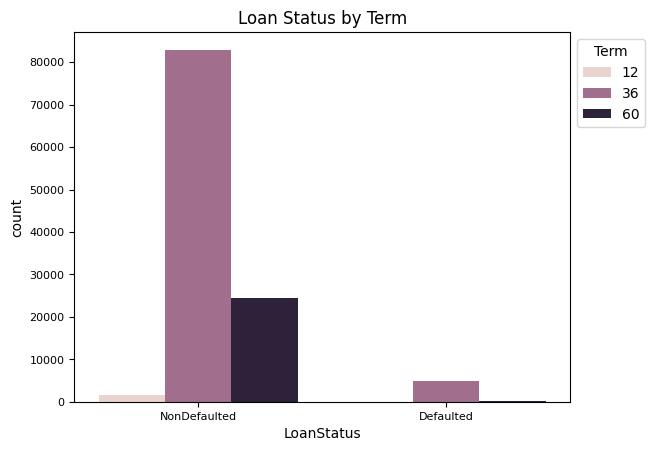

In [10]:
ax = sns.countplot(data = df, x = 'LoanStatus', hue = 'Term', hue_order = df['Term'].value_counts().index)
ax.yaxis.set_tick_params(labelsize=8)
ax.xaxis.set_tick_params(labelsize=8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Loan Status by Term')
plt.show()